In [1]:
import json
import glob
import os
import pprint
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [2]:
files = "/accounts/projects/jsteinhardt/sauravkadavath/gene_expression_294/checkpoints/test_on_rest/*/test_results.json"

all_cells_results = dict()
for results_fname in glob.glob(files):
    cell_id = results_fname.split("/")[-2]
    all_cells_results[cell_id] = dict()
    
    with open(results_fname, 'r') as f:
        results = json.load(f)
    
    for test_cell_id, test_cell_results in results.items():
        all_cells_results[cell_id][test_cell_id] = test_cell_results['test_auroc']        


In [3]:
matrix = np.zeros((55, 55))

all_cells = [
    "E104",
    "E094",
    "E098",
    "E100",
    "E085",
    "E087",
    "E097",
    "E106",
    "E065",
    "E105",
    "E066",
    "E114",
    "E116",
    "E118",
    "E119",
    "E120",
    "E122",
    "E079",
    "E123",
    "E113",
    "E003",
    "E127",
    "E027",
    "E004",
    "E006",
    "E057",
    "E056",
    "E055",
    "E007",
    "E054",
    "E058",
    "E011",
    "E053",
    "E050",
    "E012",
    "E013",
    "E016",
    "E059",
    "E024",
    "E117",
    "E070",
    "E071",
    "E038",
    "E096",
    "E109",
    "E112",
    "E095",
    "E047",
    "E084",
    "E082",
    "E062",
    "E005",
    "E061",
    "E028",
    "E037"
]

for cell_id in all_cells:
    # matrix[i] contains results of training on cell i and evaluating on all other cells
    for test_cell_id, test_cell_results in all_cells_results[cell_id].items():
        matrix[all_cells.index(cell_id)][all_cells.index(test_cell_id)] = all_cells_results[cell_id][test_cell_id]    

In [7]:
# Load in test on same data from normal deepchrome folder
files = "/accounts/projects/jsteinhardt/sauravkadavath/gene_expression_294/checkpoints/deepchrome/*/test_results.json"

for results_fname in glob.glob(files):
    cell_id = results_fname.split("/")[-2]
    
    with open(results_fname, 'r') as f:
        results = json.load(f)
        
    auroc = results[cell_id]['test_auroc']
    idx = all_cells.index(cell_id)
    matrix[idx][idx] = auroc
    matrix[:][idx] -= auroc
        


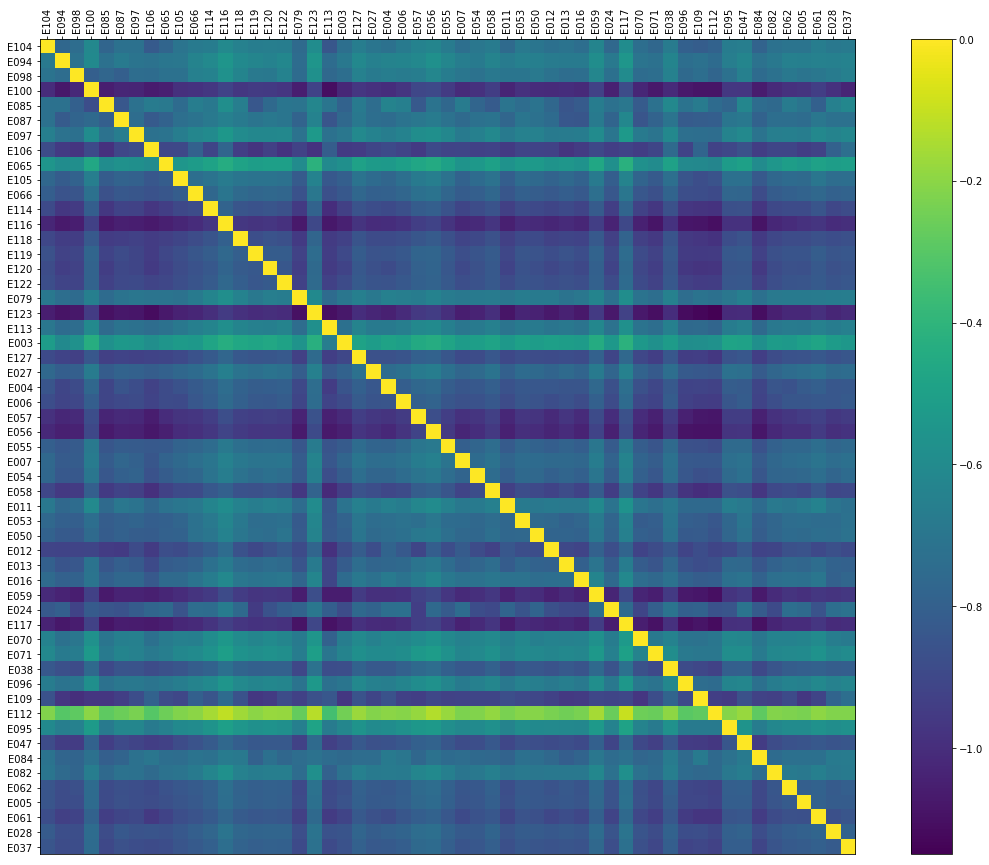

In [8]:
plt.figure(figsize=(20,15))
plt.imshow(matrix, norm=matplotlib.colors.Normalize(vmax=np.max(matrix), vmin=np.min(matrix)))
plt.colorbar()
plt.xticks(range(len(all_cells)), all_cells, rotation=90)
plt.yticks(range(len(all_cells)), all_cells, rotation=0)
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True


In [9]:
np.mean(matrix)

-0.7723729091918935